Model Evaluation:
Accuracy  : 0.33
Precision : 0.50
Recall    : 0.50
F1 Score  : 0.50


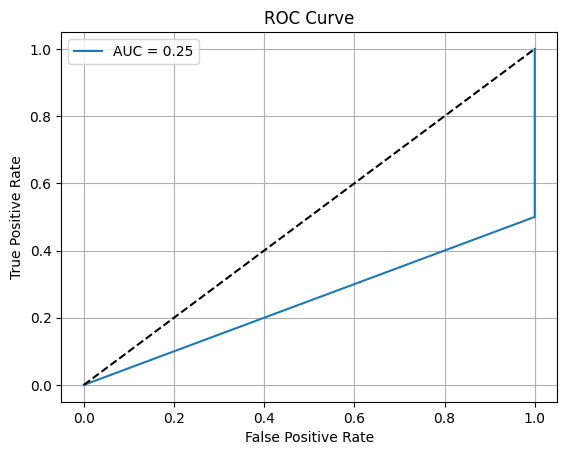

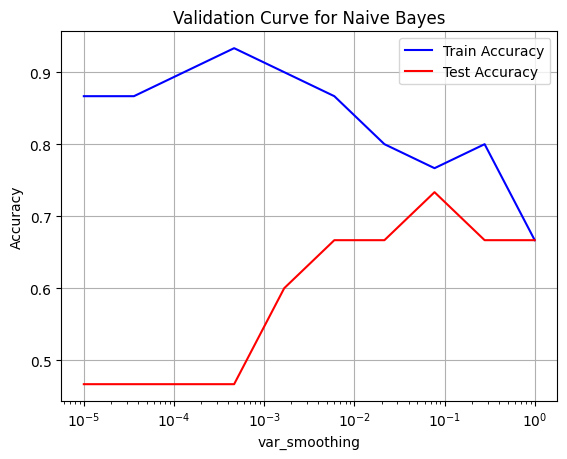

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# 1. Create sample patient data
data = {
    'Age': [23, 35, 44, 29, 50, 67, 38, 41, 25, 60, 33, 47, 53, 69, 34],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Cough': [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
    'Fever': [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
    'Shortness_of_Breath': [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
    'COVID': [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# 2. Encode 'Sex' column (Male=1, Female=0)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# 3. Shuffle and split the data
df = shuffle(df, random_state=42)
X = df.drop('COVID', axis=1)
y = df['COVID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
print("Model Evaluation:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision : {precision_score(y_test, y_pred):.2f}")
print(f"Recall    : {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score  : {f1_score(y_test, y_pred):.2f}")

# 6. Plot ROC Curve
if len(np.unique(y_test)) > 1:
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# 7. Plot Validation Curve for var_smoothing
param_range = np.logspace(-5, 0, 10)
train_scores, test_scores = validation_curve(
    GaussianNB(), X, y, param_name="var_smoothing", param_range=param_range,
    cv=3, scoring="accuracy"
)

plt.figure()
plt.semilogx(param_range, train_scores.mean(axis=1), label="Train Accuracy", color='blue')
plt.semilogx(param_range, test_scores.mean(axis=1), label="Test Accuracy", color='red')
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy")
plt.title("Validation Curve for Naive Bayes")
plt.legend()
plt.grid(True)
plt.show()
